<a href="https://colab.research.google.com/github/msmsm104/TIL/blob/main/20220530/%EC%BA%98%EB%A6%AC%ED%8F%AC%EB%8B%88%EC%95%84_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1(Regression)_0530.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source : https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

## 1. 데이터 및 라이브러리 불러오기

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# california 데이터 불러오기
from sklearn.datasets import fetch_california_housing

X = fetch_california_housing(as_frame=True)['data']
y = fetch_california_housing(as_frame=True)['target']
data = pd.concat([X, y], axis=1)

display(X)
display(y)
display(data)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


---

## 2. Data Preprocessing
    1. 결측치 확인
    2. feature selection

In [48]:
# 결측치를 확인

data.info()

## 모든 column의 dtype이 float => 결측치가 없음을 확신할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [49]:
## 분석에 필요없는 column을 제거합니다.

## 이번에는 모든 column을 사용하도록 한다.

---

## 3. EDA
    - feature distribution
    - target distribution

In [50]:
data.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


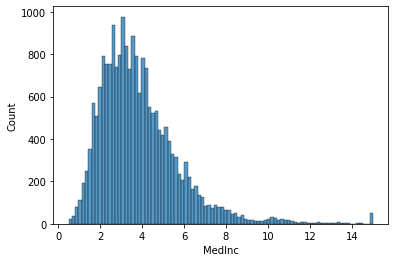

In [51]:
## feature distribution

sns.histplot(data=data, x='MedInc')

## clipping(상한선) 이 발견된다.

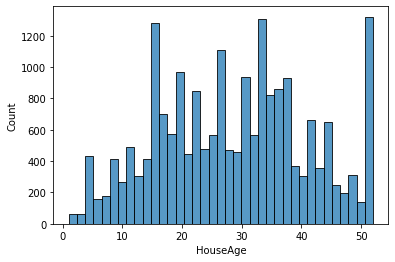

In [52]:
sns.histplot(data=data, x='HouseAge')

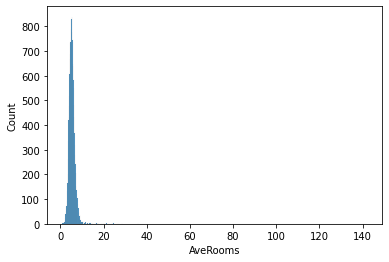

In [53]:
sns.histplot(data=data, x='AveRooms')

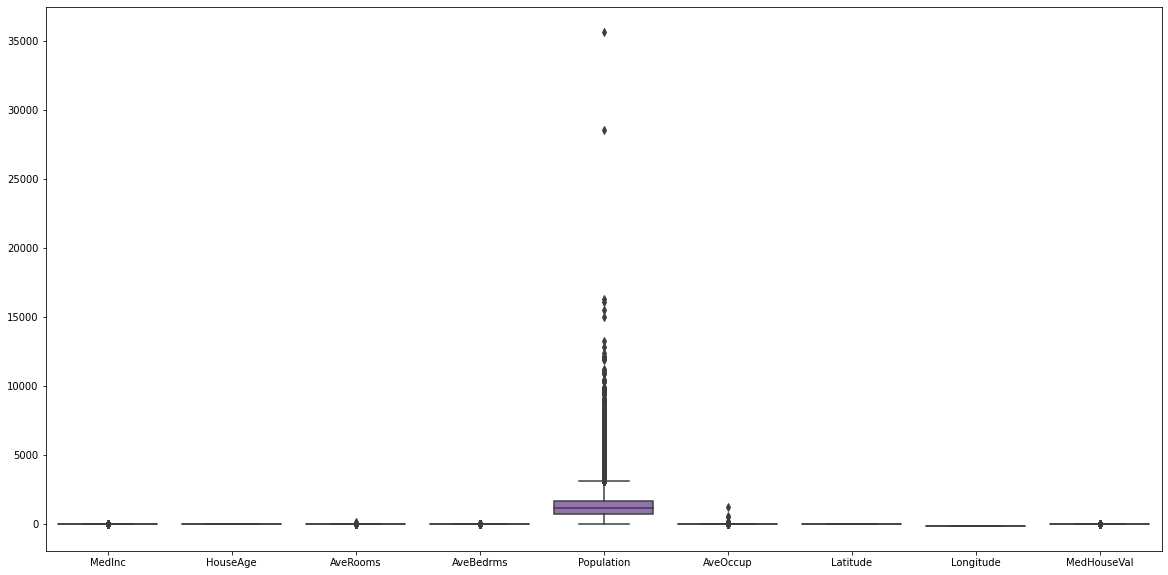

In [54]:
# sns.histplot(data=data, x='AveBedrms')
plt.figure(figsize=(20, 10))
sns.boxplot(data=data)
plt.show()

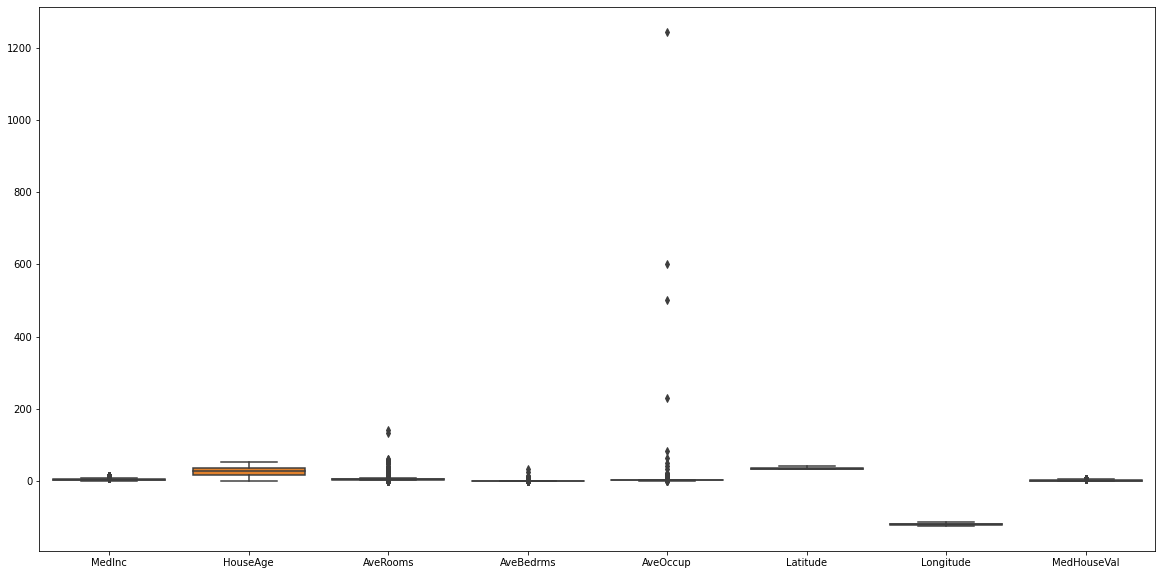

In [55]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data.drop(columns='Population'))
plt.show()

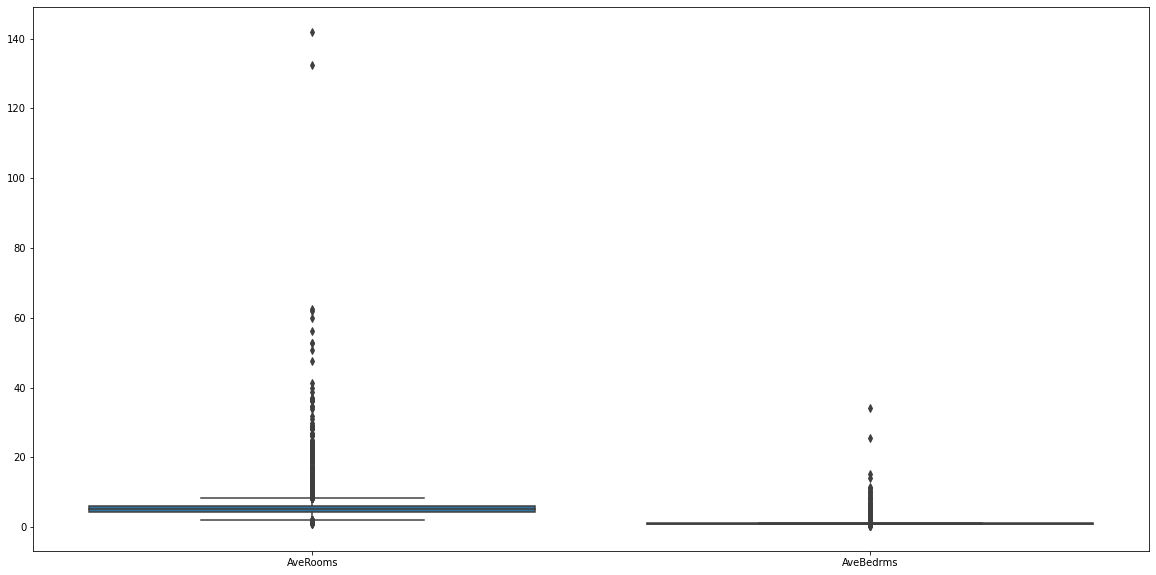

In [56]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[['AveRooms', 'AveBedrms']])
plt.show()

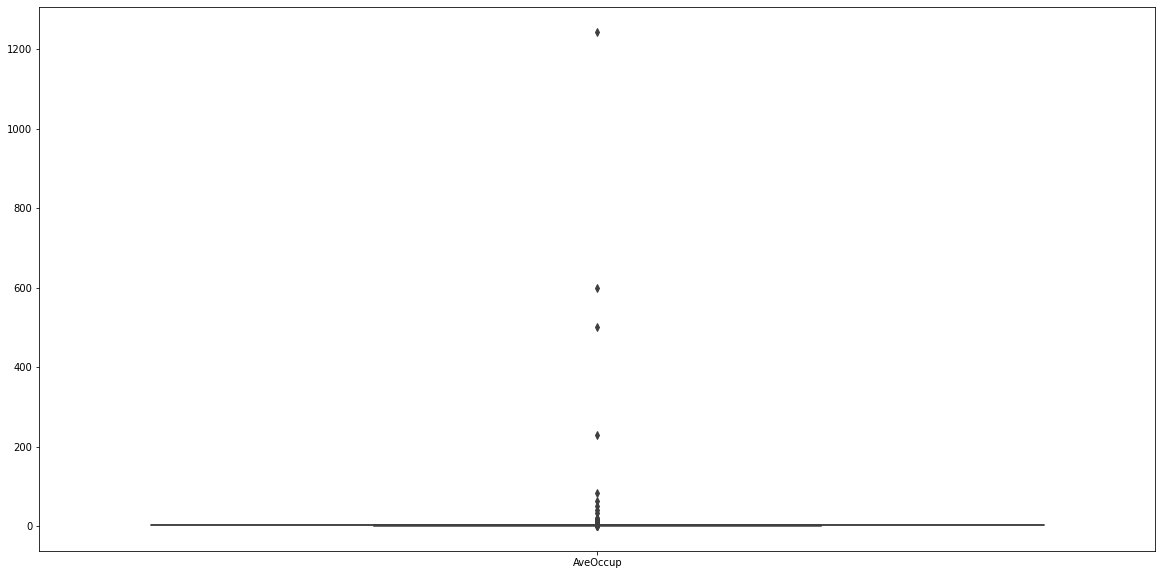

In [57]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[['AveOccup']])
plt.show()

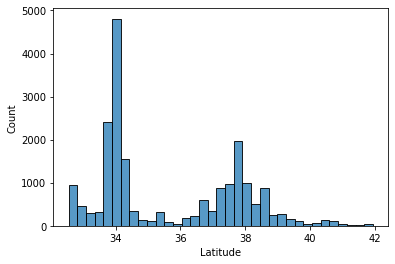

In [58]:
sns.histplot(data=data, x='Latitude')

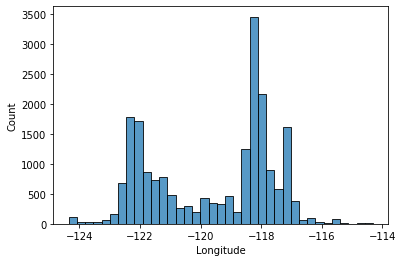

In [59]:
sns.histplot(data=data, x='Longitude')

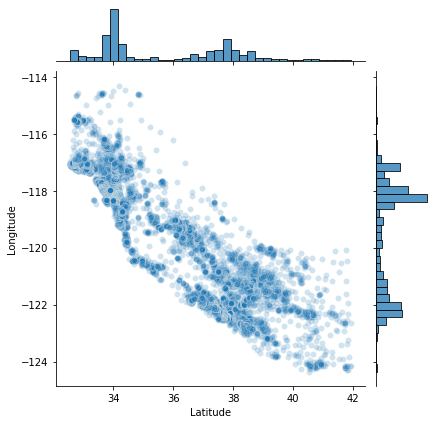

In [60]:
sns.jointplot(data=data, x='Latitude', y='Longitude', alpha=0.2)

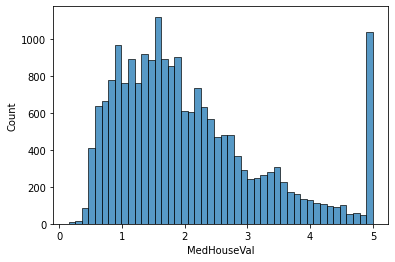

In [61]:
## target distribution

sns.histplot(data=data, x='MedHouseVal')

## clipping이 관측된다.

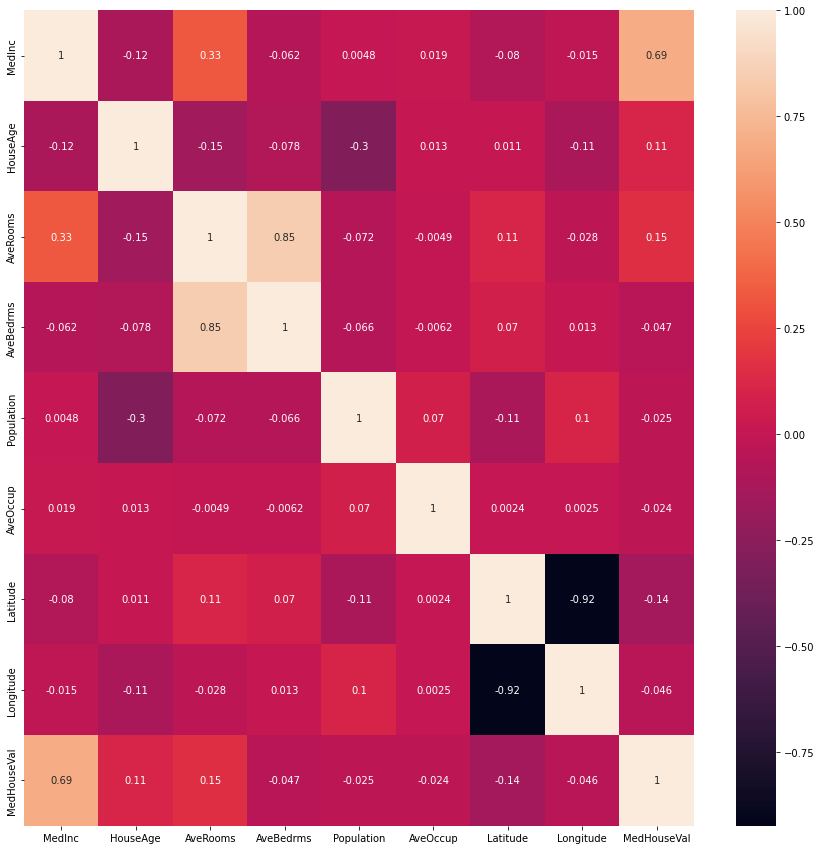

In [62]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True)
plt.show()

## AveRooms - AveBedrms/ Longitude-Latitude  (다중공선성) - 둘중 하나만 써주는게 좋다.



In [63]:
## outlier를 판단해서 제거

# data[data['AveRooms'] > 100]
# data[data['AveOccup'] > 200]

data = data[(data['AveRooms'] <= 100) & (data['AveOccup'] <= 200)]

## AveBedrms, Longitude column 제거

data = data.drop(columns=['AveBedrms', 'Longitude']) # - collinearity (다중공선성)

In [64]:
data

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,0.847


---

## 4. Training
    - train-test split
    - Standardization
    - Model training
    - Hyper-parameter tuning
    - Evaluation

In [65]:
X = data.drop(columns='MedHouseVal')
y = data['MedHouseVal']

display(X, y)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86
2,7.2574,52.0,8.288136,496.0,2.802260,37.85
3,5.6431,52.0,5.817352,558.0,2.547945,37.85
4,3.8462,52.0,6.281853,565.0,2.181467,37.85
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20634, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=0xC0FFEE)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16507, 6) (4127, 6) (16507,) (4127,)


In [67]:
## valdation 을 위한 데이터도 나눠 준다. (train data에서)

X_train, X_val, y_train, y_val = \
train_test_split(X_train, y_train, test_size=0.25, random_state=0xC0FFEE)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

## train : val : test / 6 : 2 : 2의 비율로 split 완료.

(12380, 6) (4127, 6) (12380,) (4127,)


In [68]:
## feature scaling (StandardScaler) - 평균이 0 분산이 1이 되게 scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [69]:
## 학습을 위한 라이브러리 세팅

from sklearn.linear_model import LinearRegression   # 1. Linear Regression
from sklearn.linear_model import Lasso              # 2. Lasso
from sklearn.linear_model import Ridge              # 3. Ridge
from xgboost.sklearn import XGBRegressor            # 4. XGBoost
from lightgbm.sklearn import LGBMRegressor          # 5. LightGBM

from sklearn.metrics import mean_squared_error

In [74]:
len(pred_val_1)

12380

In [76]:
## training

reg_1 = LinearRegression()
reg_2 = Lasso()
reg_3 = Ridge()
reg_4 = XGBRegressor()
reg_5 = LGBMRegressor()


reg_1.fit(X_train, y_train)
reg_2.fit(X_train, y_train)
reg_3.fit(X_train, y_train)
reg_4.fit(X_train, y_train)
reg_5.fit(X_train, y_train)

## train, val data를 통한 prediction을 통해 model이 overfitting 되었는지 확인할 수 있다.
pred_train_1 = reg_1.predict(X_train)
pred_train_2 = reg_2.predict(X_train)
pred_train_3 = reg_3.predict(X_train)
pred_train_4 = reg_4.predict(X_train)
pred_train_5 = reg_5.predict(X_train)


pred_val_1 = reg_1.predict(X_val)
pred_val_2 = reg_2.predict(X_val)
pred_val_3 = reg_3.predict(X_val)
pred_val_4 = reg_4.predict(X_val)
pred_val_5 = reg_5.predict(X_val)


mse_train_1 = mean_squared_error(y_train, pred_train_1)
mse_val_1 = mean_squared_error(y_val, pred_val_1)
mse_train_2 = mean_squared_error(y_train, pred_train_2)
mse_val_2 = mean_squared_error(y_val, pred_val_2)
mse_train_3 = mean_squared_error(y_train, pred_train_3)
mse_val_3 = mean_squared_error(y_val, pred_val_3)
mse_train_4 = mean_squared_error(y_train, pred_train_4)
mse_val_4 = mean_squared_error(y_val, pred_val_4)
mse_train_5 = mean_squared_error(y_train, pred_train_5)
mse_val_5 = mean_squared_error(y_val, pred_val_5)

print("1. LinearRegression,\t train/val = %.4f, %.4f" % (mse_train_1, mse_val_1))
print("2. Lasso,\t\t train/val = %.4f, %.4f" % (mse_train_2, mse_val_2))
print("3. Ridge,\t\t train/val = %.4f, %.4f" % (mse_train_3, mse_val_3))
print("4. XGBoost,\t\t train/val = %.4f, %.4f" % (mse_train_4, mse_val_4))
print("5. LightGBM,\t\t train/val = %.4f, %.4f" % (mse_train_5, mse_val_5))


## 결과를 보면 Lasso model의 성능이 가장 좋지않고, LightGBM의 성능이 가장 좋게 나타난다.

## 또 한, 만약 model이 overfitting된 경우라면 val 데이터에 대한 mse가 높게 나올것이다. 


[05:45:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1. LinearRegression,	 train/val = 0.6165, 0.5851
2. Lasso,		 train/val = 1.3381, 1.3097
3. Ridge,		 train/val = 0.6165, 0.5851
4. XGBoost,		 train/val = 0.3372, 0.3717
5. LightGBM,		 train/val = 0.2417, 0.3303


In [82]:
## Hyper-parameter tuning
# 1. Human-Search
# 2. Grid Search (GridSearchCV) : 주어진 hp의 조합을 모두 돌려보는 방식.
# 3. Bayesian Optimization (hyperopt, optuna, ...) : hyper-parameter를 최적화하는 베이지안 방식을 사용.

## GridSearchCV를 이용해보자.

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' : [3,5,-1],         # 3
    'learning_rate' : [0.1, 0.01],  # 2
    'n_estimators' : [50, 100]      # 2
}

# 총 hyper-parameter 조합이 12개가 된다.

gcv = GridSearchCV(reg_5, param_grid, scoring='neg_mean_squared_error', verbose=1)
gcv.fit(X_train, y_train)
# print(gcv.cv_results_)
print(gcv.best_estimator_)
print(gcv.best_params_)

## 위의 경우에 대해 학습을 해보았을 때 결국은 default 값의 결과가 가장 좋았다.

Fitting 5 folds for each of 12 candidates, totalling 60 fits
LGBMRegressor()
{'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100}


## 5. Test (Prediction)

In [ ]:
final_model = gcv.best_estimator_

In [77]:
## Prediction


result = reg_1.predict(X_test)
result2 = reg_2.predict(X_test)
result3 = reg_3.predict(X_test)
result4 = reg_4.predict(X_test)
result5 = reg_5.predict(X_test)



In [79]:
# Summary!
print("---------- Linear Regression ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result))

print("---------- Lasso ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result2))

print("---------- Ridge ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result3))

print("---------- XGBoost ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result4))

print("---------- LightGBM ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result5))

## 테스트 데이터에 대해서도 lightGBM이 가장 좋은 성능을 보이는것을 확인할 수 있다.

---------- Linear Regression ---------
MSE in training: 0.6009
---------- Lasso ---------
MSE in training: 1.3324
---------- Ridge ---------
MSE in training: 0.6009
---------- XGBoost ---------
MSE in training: 0.3769
---------- LightGBM ---------
MSE in training: 0.3392
